In [ ]:
'''
from google.colab import drive
!pip install pandas
!pip install matplotlib
'''

'\nfrom google.colab import drive\n!pip install pandas\n!pip install matplotlib\n'

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8
from pandas_datareader import data as wb
import warnings
warnings.filterwarnings("ignore")

In [ ]:
'''
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the new folder path
new_folder_path = '/content/drive/My Drive/Fase 2'
'''

"\nimport os\n\n# Mount Google Drive\ndrive.mount('/content/drive')\n\n# Define the new folder path\nnew_folder_path = '/content/drive/My Drive/Fase 2'\n"

In [ ]:
'''

## Carrega Base de Dados
import pandas as pd

dados = pd.read_csv('/content/drive/My Drive/Fase 2/Dados Históricos - Ibovespa.csv', encoding='utf-8', sep=',', thousands='.', decimal=',')
### Arrumar a Data para que tenha 8 digitos em todas tipo 10032024 e 04032024

dados['Data'] = dados['Data'].astype(str).str.zfill(8)
# Coloca em Formato de Data
dados['Data'] = pd.to_datetime(dados['Data'], format='%d%m%Y', errors='coerce')
# Cria coluna de Mês e Ano
dados['mes'] = dados['Data'].dt.month
dados['ano'] = dados['Data'].dt.year
dados.head(15)
'''

"\n\n## Carrega Base de Dados\nimport pandas as pd\n\ndados = pd.read_csv('/content/drive/My Drive/Fase 2/Dados Históricos - Ibovespa.csv', encoding='utf-8', sep=',', thousands='.', decimal=',')\n### Arrumar a Data para que tenha 8 digitos em todas tipo 10032024 e 04032024\n\ndados['Data'] = dados['Data'].astype(str).str.zfill(8)\n# Coloca em Formato de Data\ndados['Data'] = pd.to_datetime(dados['Data'], format='%d%m%Y', errors='coerce')\n# Cria coluna de Mês e Ano\ndados['mes'] = dados['Data'].dt.month\ndados['ano'] = dados['Data'].dt.year\ndados.head(15)\n"

In [ ]:
## Carrega Base de Dados
import pandas as pd

dados = pd.read_csv('/content/Dados Históricos - Ibovespa.csv', encoding='utf-8', sep=',', thousands='.', decimal=',')
### Arrumar a Data para que tenha 8 digitos em todas tipo 10032024 e 04032024

dados['Data'] = dados['Data'].astype(str).str.zfill(8)
# Coloca em Formato de Data
dados['Data'] = pd.to_datetime(dados['Data'], format='%d%m%Y', errors='coerce')
# Cria coluna de Mês e Ano
dados['mes'] = dados['Data'].dt.month
dados['ano'] = dados['Data'].dt.year
dados.head(15)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,mes,ano
0,2020-03-16,71168,82565,82565,70855,"12,85M","-13,92%",3,2020
1,2020-03-13,82678,72621,83758,72621,"15,77M","13,91%",3,2020
2,2020-03-12,72583,85103,85103,68488,"12,01M","-14,78%",3,2020
3,2020-03-11,85171,92202,92202,80796,"11,79M","-7,64%",3,2020
4,2020-03-10,92214,86071,92230,86071,"13,53M","7,14%",3,2020
5,2020-03-09,86067,97982,97982,85880,"14,65M","-12,17%",3,2020
6,2020-03-06,97997,102230,102230,96886,"11,86M","-4,14%",3,2020
7,2020-03-05,102233,107217,107217,100536,"8,60M","-4,65%",3,2020
8,2020-03-04,107224,105540,107809,105042,"8,41M","1,60%",3,2020
9,2020-03-03,105537,106630,108804,104405,"9,39M","-1,02%",3,2020


In [ ]:
### ve se tem data inválida ou seja, o comando de cima deixou alguma data passar e não colocou 8 digitos.
datas_invalidas = dados[dados['Data'].isna()]
print("Datas inválidas:")
print(datas_invalidas)

Datas inválidas:
Empty DataFrame
Columns: [Data, Último, Abertura, Máxima, Mínima, Vol., Var%, mes, ano]
Index: []


In [ ]:
# Tranforma em formato de data
dados['Data'] = pd.to_datetime(dados['Data'], format='%d/%m/%Y')

In [ ]:
## Arruma a data em formato Crescente
dados.sort_values(by='Data', inplace=True)
dados.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,mes,ano
4999,2000-01-04,15851,16908,16908,15851,"102,42M","-6,37%",1,2000
4998,2000-01-05,16245,15871,16302,15350,"112,10M","2,49%",1,2000
4997,2000-01-06,16107,16237,16499,15977,"105,25M","-0,85%",1,2000
4996,2000-01-07,16309,16125,16449,16125,"633,18M","1,25%",1,2000
4995,2000-01-10,17022,16325,17057,16325,"103,69M","4,37%",1,2000
4994,2000-01-11,16573,17045,17197,16573,"968,85M","-2,64%",1,2000
4993,2000-01-12,16617,16574,16724,16331,"984,62M","0,27%",1,2000
4992,2000-01-13,17298,16663,17715,16663,"145,95M","4,10%",1,2000
4991,2000-01-14,17658,17306,17800,17306,"135,14M","2,08%",1,2000
4990,2000-01-17,18053,17678,18099,17678,"621,53M","2,24%",1,2000


In [ ]:
## Coloca a coluna de "Data" como index:
dados.set_index('Data', inplace=True)

In [ ]:
dados.tail(5)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mes,ano
Data,,,,,,,,
2020-03-10,92214,86071,92230,86071,"13,53M","7,14%",3,2020
2020-03-11,85171,92202,92202,80796,"11,79M","-7,64%",3,2020
2020-03-12,72583,85103,85103,68488,"12,01M","-14,78%",3,2020
2020-03-13,82678,72621,83758,72621,"15,77M","13,91%",3,2020
2020-03-16,71168,82565,82565,70855,"12,85M","-13,92%",3,2020


In [ ]:
dados.head(5)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,mes,ano
Data,,,,,,,,
2000-01-04,15851,16908,16908,15851,"102,42M","-6,37%",1,2000
2000-01-05,16245,15871,16302,15350,"112,10M","2,49%",1,2000
2000-01-06,16107,16237,16499,15977,"105,25M","-0,85%",1,2000
2000-01-07,16309,16125,16449,16125,"633,18M","1,25%",1,2000
2000-01-10,17022,16325,17057,16325,"103,69M","4,37%",1,2000


In [ ]:
# ## Separar a Base em Treino e Teste -- normalmente o teste é 20% da base de trabalho.
semanas = 208
treino = dados.iloc[:-semanas, 0:1].copy() # 2000 até 12/2019
teste = dados.iloc[-semanas:, 0:1].copy()  # 2020 a 2020

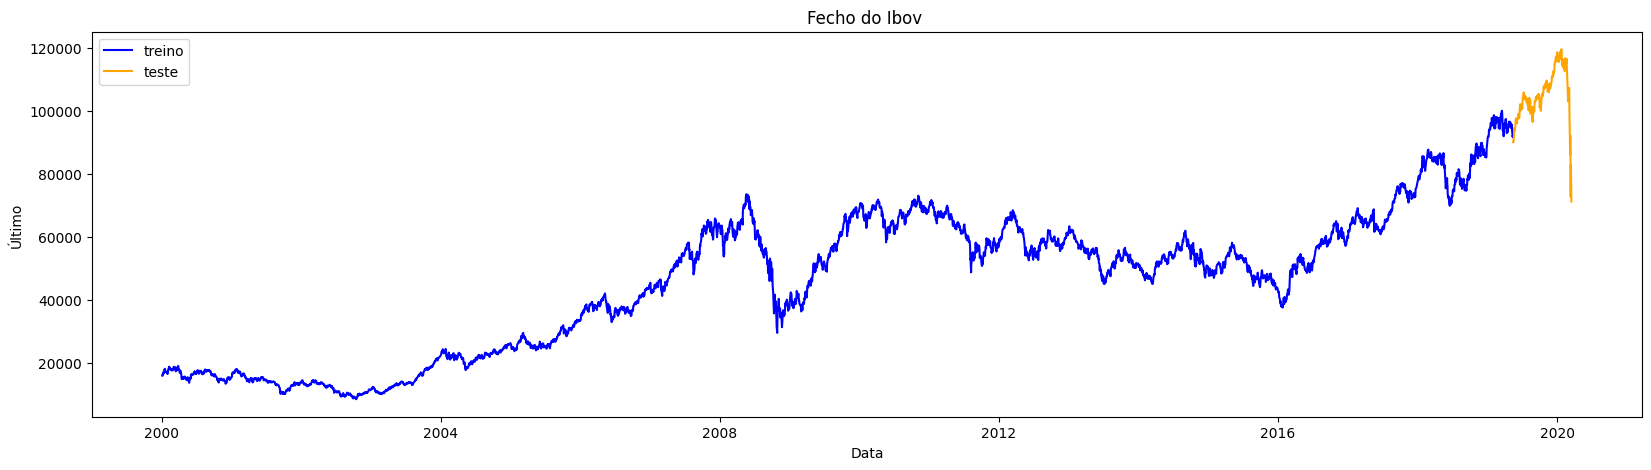

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.title('Fecho do Ibov ')
plt.plot(treino['Último'], color='b')
plt.plot(teste['Último'], color='orange')
plt.legend(['treino','teste'])
plt.xlabel('Data')
plt.ylabel('Último')
plt.show()

### Decompoe a série pra vermos a sazo, médias, resíduos

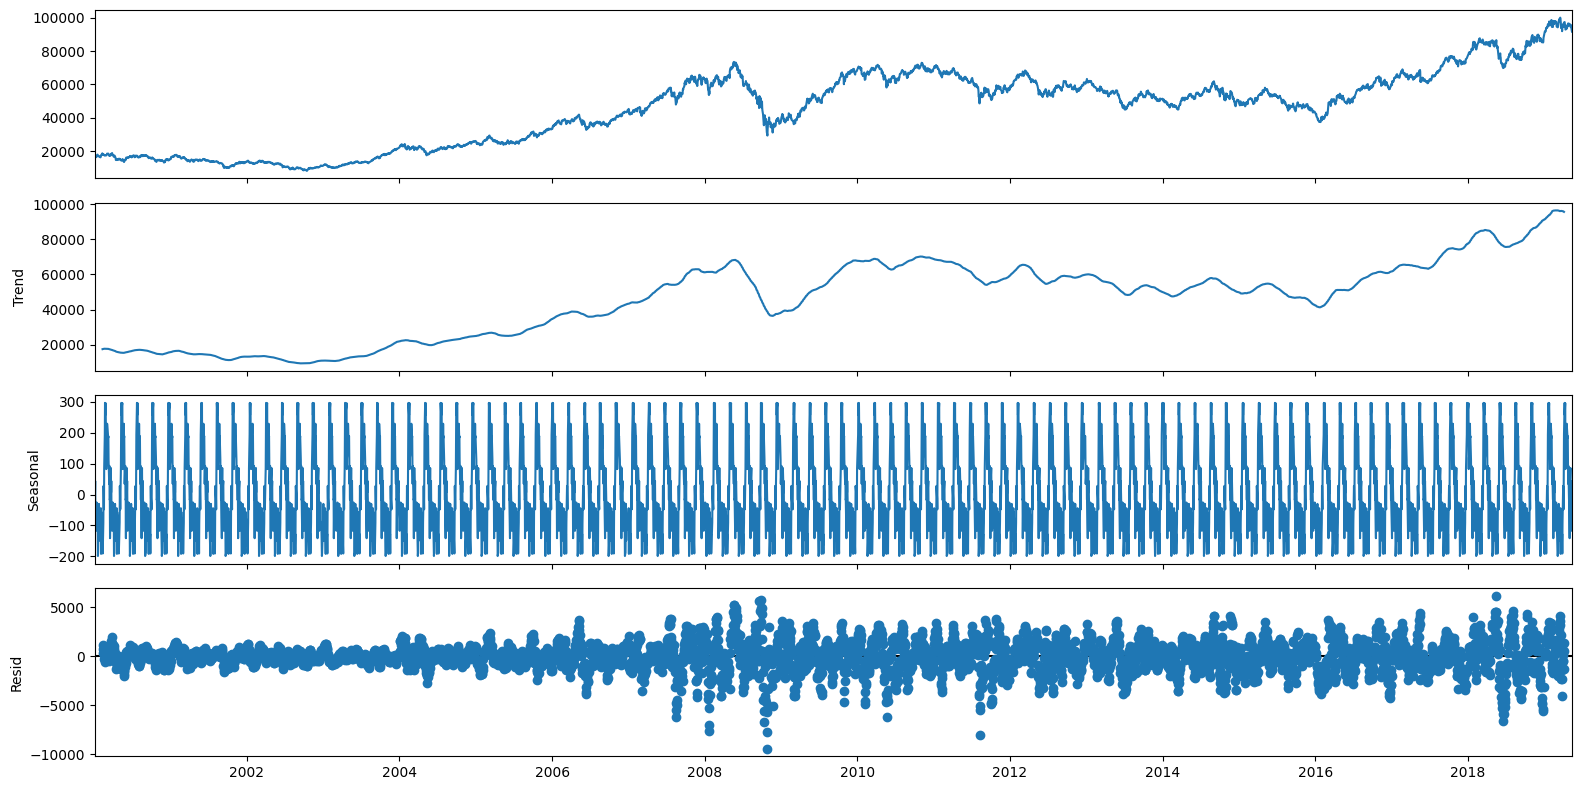

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

season = seasonal_decompose(treino, period=52) #52 = 1 ano
fig = season.plot();
fig.set_size_inches(16,8)